In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import os
import sys
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")
# @title Mount Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/github/linearfit_2p/

/content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/github/linearfit_2p


In [4]:
sys.path.append('code/')

In [5]:
from linearfit import LinearFit

In [6]:
base_dir =  '/content/drive/MyDrive/Work/Sciencing/Data/'

In [7]:
# data load


sc_file = base_dir +'sc_hcp1065_2mm.xlsx'
sc_df = pd.read_excel(sc_file)

In [8]:
# sc  template
sc = sc_df.values[:,1:].astype('float')
SC =(sc+sc.T)*0.5
       
sc = 0.5*np.log1p(SC)/np.linalg.norm(np.log1p(SC))



0
0.651463811292359
gie= -0.5691048340335071
gee= 0.591972094368068
gii= 0.571785165386493
gei= 0.572529143882429
simFC min: -0.005251708214844506


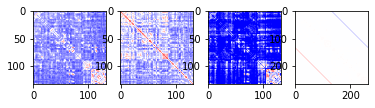

1
0.6795534325436188
gie= -0.5718407518345171
gee= 0.5945866359741155
gii= 0.5749131771590346
gei= 0.5752570826531701
simFC min: -0.005899435178655649


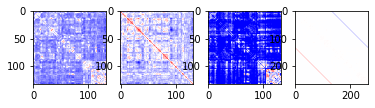

2
0.7950957867302669
gie= -0.5675316575423318
gee= 0.5904565074886184
gii= 0.5701548916253203
gei= 0.5710803549435113
simFC min: -0.006246241771977799


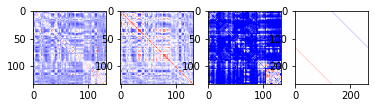

3
0.6048487435668052
gie= -0.5655490151130471
gee= 0.5886313582606958
gii= 0.5674698799971118
gei= 0.56882907006255
simFC min: -0.0035167508418021483


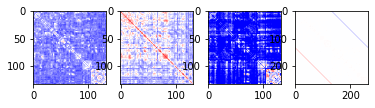

4
0.7093723742881999
gie= -0.566366038769813
gee= 0.5898256343047855
gii= 0.568604361916079
gei= 0.5699646463341846
simFC min: -0.0050573660057007894


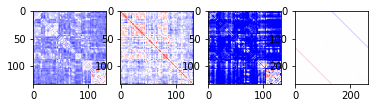

5
0.7342817676167047
gie= -0.565193985761535
gee= 0.5884260788323556
gii= 0.5674712262396964
gei= 0.568765022124299
simFC min: -0.005135164341185487


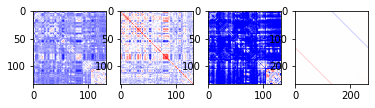

6
0.6665897450003769
gie= -0.5694132623671814
gee= 0.5930019345282492
gii= 0.5718823167276622
gei= 0.5730797534052127
simFC min: -0.005541304518869566


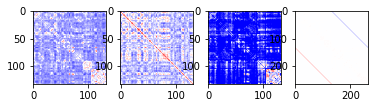

7
0.7266233022191945
gie= -0.5689478516922332
gee= 0.5919097716908052
gii= 0.5718639827624911
gei= 0.5724704145874916
simFC min: -0.0070103207316949655


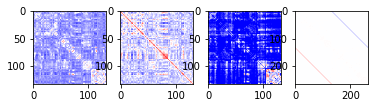

8
0.742560675831699
gie= -0.5617262474945768
gee= 0.5859943607198961
gii= 0.5638810552342141
gei= 0.5656164954300016
simFC min: -0.0051065632865402895


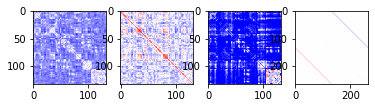

9
0.6776212326529673
gie= -0.5665455532355441
gee= 0.5896299990378326
gii= 0.5691390363629427
gei= 0.5699764861518891
simFC min: -0.004795403761593271


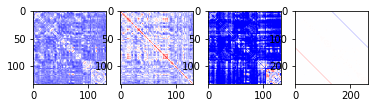

10
0.7168902590177904
gie= -0.5655123450125906
gee= 0.5888688007133771
gii= 0.5681224441790292
gei= 0.5690853693608988
simFC min: -0.006711376099555486


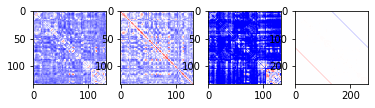

11
0.7328294350778992
gie= -0.5650409734123963
gee= 0.5887536128811867
gii= 0.5676184550457901
gei= 0.5687585069396147
simFC min: -0.00677793761133734


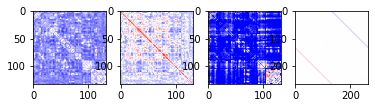

12
0.7229224643985385
gie= -0.5675054066447961
gee= 0.5906944288817518
gii= 0.5701029371242804
gei= 0.5710136382893233
simFC min: -0.006061320422959158


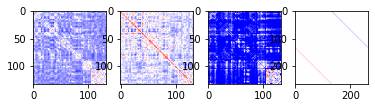

13
0.7639820830878246
gie= -0.5618142865701408
gee= 0.5858263579705529
gii= 0.5641893951213748
gei= 0.565667460439777
simFC min: -0.007287268074990796


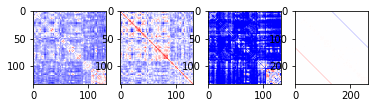

14
0.7025169277165703
gie= -0.5649044628250552
gee= 0.588299642098688
gii= 0.5676941721765019
gei= 0.5684998986843041
simFC min: -0.0061249496893025284


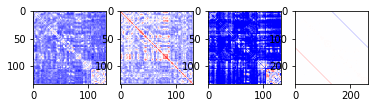

15
0.7248988637083779
gie= -0.566391173841482
gee= 0.5900779304349959
gii= 0.5689111352629056
gei= 0.5701139257448743
simFC min: -0.006838168088246286


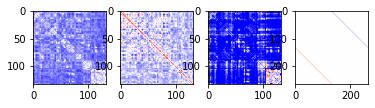

16
0.693543796838475
gie= -0.5586679935613306
gee= 0.5818753963652845
gii= 0.5600522240509459
gei= 0.5631615784075633
simFC min: -0.00375118529462643


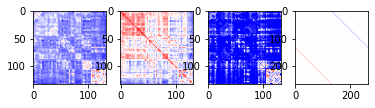

17
0.7372718854984702
gie= -0.5608739109982894
gee= 0.5853811411988804
gii= 0.562673788023344
gei= 0.5647850073868691
simFC min: -0.004483551698246149


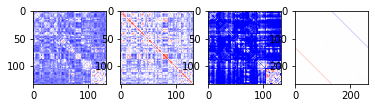

18
0.6705444460081216
gie= -0.5665733060507898
gee= 0.5895622390894101
gii= 0.5691337006526705
gei= 0.5699755066282186
simFC min: -0.004490333871756851


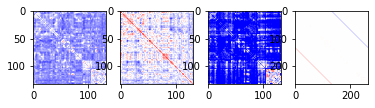

19
0.6198734160939374
gie= -0.5653501902118099
gee= 0.5886530153328525
gii= 0.5672039312689385
gei= 0.5687445027662137
simFC min: -0.004026680008059627


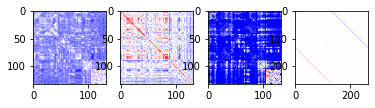

20
0.6551645955821714
gie= -0.5637611613490974
gee= 0.5871231610698944
gii= 0.5655766973073316
gei= 0.5671697094684293
simFC min: -0.0038863527255414846


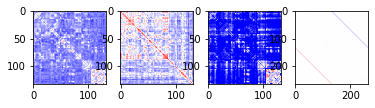

21
22
0.7119174657761419
gie= -0.5661398251886371
gee= 0.589407741501978
gii= 0.5684202813430196
gei= 0.5696606689135437
simFC min: -0.004978856540282389


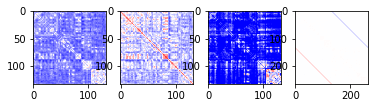

23
0.7189270904457413
gie= -0.5646592307071172
gee= 0.5886779421474548
gii= 0.5669645936853631
gei= 0.5684810266617897
simFC min: -0.00624014780649418


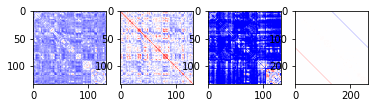

24
0.6933939271224703
gie= -0.5671288311532952
gee= 0.5901416293409792
gii= 0.569700839212508
gei= 0.57057631603759
simFC min: -0.005203984592223573


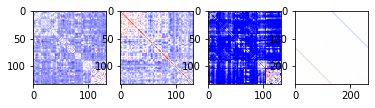

25
0.709658654497512
gie= -0.5659988658113685
gee= 0.5892466643077103
gii= 0.5688807158902883
gei= 0.5695828776305025
simFC min: -0.008665493495068998


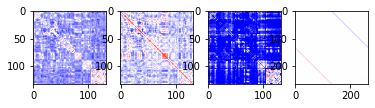

26
27
0.6751540579006452
gie= -0.5646950534090411
gee= 0.5886777161336862
gii= 0.5669541848720601
gei= 0.5684566878872882
simFC min: -0.003984863030957465


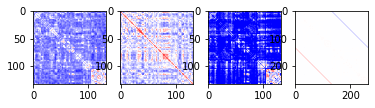

28
0.7287575379514221
gie= -0.5654401851794777
gee= 0.5889512565564969
gii= 0.5677729544473407
gei= 0.5690335723391612
simFC min: -0.005388513922836142


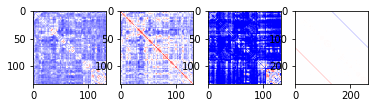

29
0.5932700171418556
gie= -0.5668525525806486
gee= 0.5900265677458316
gii= 0.5685224189206082
gei= 0.5700346215197077
simFC min: -0.0038846183105443652


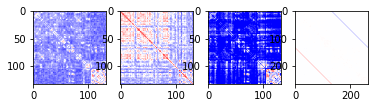

30
0.6640301581978176
gie= -0.5646617364723963
gee= 0.5883705722859875
gii= 0.566542731660648
gei= 0.5682365365165315
simFC min: -0.004106994413201516


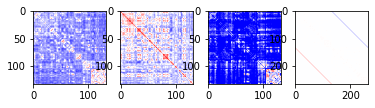

31
0.6353703259967612
gie= -0.5661233954297051
gee= 0.5896109079950992
gii= 0.5685463384999035
gei= 0.5697096455820032
simFC min: -0.00345392532527662


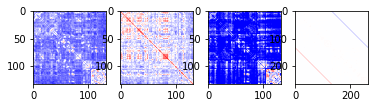

32
0.7687139684427872
gie= -0.5660961325039761
gee= 0.5890520241796658
gii= 0.5682568297207067
gei= 0.5695457627141726
simFC min: -0.0048953193006789275


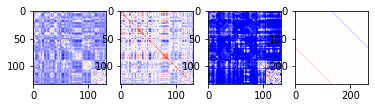

33
0.6722388745909291
gie= -0.5689806121849377
gee= 0.5917474970880746
gii= 0.5712836820438973
gei= 0.5722886655132691
simFC min: -0.004895179655926025


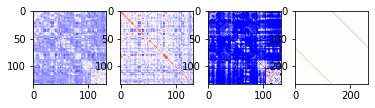

34
0.6815398940850151
gie= -0.5670125976531426
gee= 0.5901688199674339
gii= 0.5699066693982903
gei= 0.5705061809080465
simFC min: -0.005011613588431762


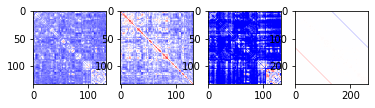

35
0.5879974871846262
gie= -0.5678299916345724
gee= 0.5908319563403274
gii= 0.5697128443397456
gei= 0.5709547515875241
simFC min: -0.003536235282175772


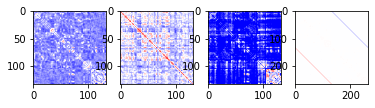

36
0.6566997032468119
gie= -0.5642042912426558
gee= 0.5877112446695848
gii= 0.5661478514805569
gei= 0.5676643730167733
simFC min: -0.004093561589432504


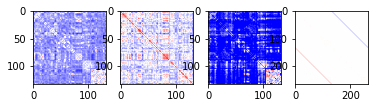

37
0.7428920294546181
gie= -0.5601118223632696
gee= 0.5844582344306236
gii= 0.5619629021529449
gei= 0.5640050966987276
simFC min: -0.004373562009861193


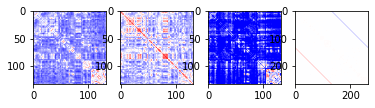

38
0.6607715185910839
gie= -0.567815889849212
gee= 0.5910180866339435
gii= 0.5704854359982962
gei= 0.5713179998198974
simFC min: -0.005489779610366043


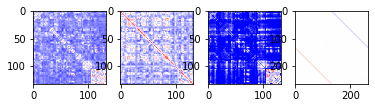

39
40
41
0.7116149532396221
gie= -0.5677754444986954
gee= 0.5910959971605037
gii= 0.5703481446367467
gei= 0.5712879428099986
simFC min: -0.006491946769045676


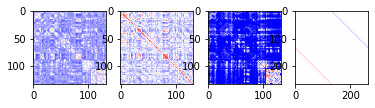

42
0.6745974776876257
gie= -0.5737652272858781
gee= 0.5934312756859306
gii= 0.5789080288497832
gei= 0.5762634572974934
simFC min: -0.0073702291100343825


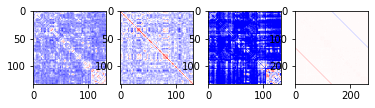

43
44
0.7621286107284505
gie= -0.5644384419669968
gee= 0.5879359984183768
gii= 0.5666107064616601
gei= 0.5681001840203186
simFC min: -0.005064263266882687


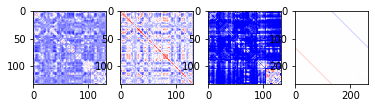

45
0.7641335367512195
gie= -0.5615738620738384
gee= 0.5858977044737542
gii= 0.5635458488172018
gei= 0.5654311040161598
simFC min: -0.00645434003203079


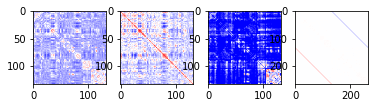

46
0.6704224973533851
gie= -0.5717764335399712
gee= 0.5946007011201517
gii= 0.5745159930174465
gei= 0.5751634894144284
simFC min: -0.004725505815729601


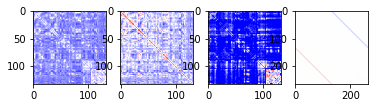

47
0.6449581853133688
gie= -0.5663690468952277
gee= 0.5896470052146852
gii= 0.5688368789023369
gei= 0.5698045369676228
simFC min: -0.003819300656406635


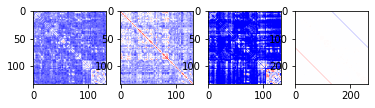

48
0.6510654404897207
gie= -0.5693347872133652
gee= 0.5924878026631073
gii= 0.571746327552147
gei= 0.5727450145402464
simFC min: -0.004220200215219528


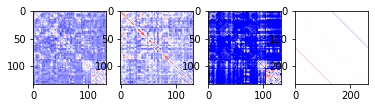

49
0.7188955634196387
gie= -0.5615603120653441
gee= 0.5861348969020876
gii= 0.5631387074852042
gei= 0.5667799052685624
simFC min: -0.004904894074957121


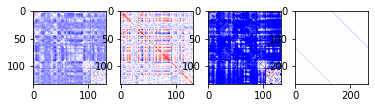

In [9]:
num_roi = 132
mask = np.tril_indices(2*num_roi, 0)
gee_lsd = []
for i in range(0, 50):#len(subs)):

    
    print(i)
    file_name = base_dir + 'Harvard-AAL-Segmen_Subject'+ '{0:03}'.format(i+1) +'_Condition001.mat'
    if os.path.isfile(file_name):
        test=scipy.io.loadmat(file_name)
        ts = np.ones((num_roi, 300))
        for i in range(num_roi):
            if test['conditionweights'][0,0][:300].mean() > 0:
                ts[i] = test['data'][0, i+3][:300, 0]
            else:
                ts[i] = test['data'][0, i+3][300:, 0]
        gee = 0.5
        gii = 0.5
        gie = 0.5
        gei = 0.5
        
        
        fc_emp = np.corrcoef(ts)
          
            
        #ts = np.loadtxt(ts_file)
        sc_a = np.zeros((num_roi*2, num_roi*2))
        fc_a = np.zeros((num_roi*2, num_roi*2))
        sc_a[:num_roi,:num_roi] = sc +0.01*fc_emp
        sc_a[num_roi:,num_roi:] = gii*np.eye(num_roi)#
        sc_a[:num_roi,num_roi:] = -0.3*np.eye(num_roi)
        sc_a[num_roi:,:num_roi] = 0.2*np.eye(num_roi)
        sc_a = sc_a/np.linalg.norm(sc_a)
        

        
        
        
        fc_a[:num_roi,:num_roi] = fc_emp
        fc_a[num_roi:,num_roi:] = .8*fc_emp #np.ones(num_roi)#
        fc_a[:num_roi,num_roi:] = 0.2*np.ones(num_roi)#0.2*fc_emp#
        fc_a[num_roi:,:num_roi] = 0.2*np.ones(num_roi)#0.2*fc_emp#
        std = 1.0e-3
        num_converge= 50
        
        model = LinearFit(sc_a, fc_a)
        model.ldm_2nd_model_fitting(std, num_converge)
        sc_fitted = model.eSC
        fc_sim = model.simFC

        fig, ax = plt.subplots(1,4)
        ax[0].imshow(fc_sim[:num_roi,:num_roi]- np.diag(np.diag(fc_sim[:num_roi,:num_roi])), cmap='bwr')
        
        ax[1].imshow(fc_emp, cmap='bwr')
        ax[2].imshow(sc, cmap='bwr')
        ax[3].imshow(sc_fitted- np.diag(np.diag(sc_fitted)), cmap='bwr')

        print(np.corrcoef(fc_emp[np.tril_indices(num_roi,-1)], fc_sim[:num_roi,:num_roi][np.tril_indices(num_roi,-1)])[0,1])
        print('gie=', np.array([sc_fitted[i,num_roi+i] for i in range(num_roi)]).mean())
        print('gee=', np.array([sc_fitted[i,i] for i in range(num_roi)]).mean())
        #sc_fitted[np.abs(sc_fitted) < 0.5*np.abs(sc_fitted).mean()] = 0
        gee_lsd.append(sc_fitted.ravel())
        #gee_lsd.append(np.concatenate([np.diag(sc_fitted[:num_roi,num_roi:2*num_roi]), np.diag(sc_fitted[num_roi:2*num_roi,:num_roi])]))
        print('gii=', np.array([sc_fitted[num_roi+i,num_roi+i] for i in range(num_roi)]).mean())
        print('gei=', np.array([sc_fitted[num_roi+i,i] for i in range(num_roi)]).mean())
        print('simFC min:', fc_sim.min())
        plt.show()

0
0.7110905159491606
gie= -0.5691232955004993
gee= 0.592543817570542
gii= 0.5719043841556922
gei= 0.5727435259823166
simFC min: -0.00787072905428898


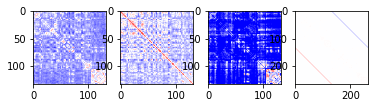

1
0.6825052627698287
gie= -0.5625124319535939
gee= 0.5864148980807787
gii= 0.5647090922396973
gei= 0.5662505922245068
simFC min: -0.004230314110695108


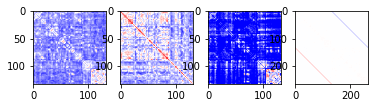

2
0.8128356116877742
gie= -0.559911952881265
gee= 0.5846254673574828
gii= 0.5616876409499816
gei= 0.5640215210310853
simFC min: -0.00745662428522185


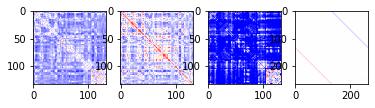

3
0.7289140412785812
gie= -0.5651982957431714
gee= 0.5891524608151978
gii= 0.5680184496884366
gei= 0.5689690997440597
simFC min: -0.009137064503996976


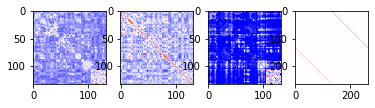

4
0.6871913768830873
gie= -0.5684428524186003
gee= 0.5918412253304289
gii= 0.571410892824798
gei= 0.5720252490079816
simFC min: -0.008349317938973578


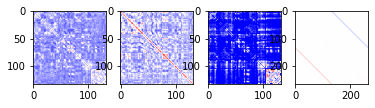

5
0.7195859846577232
gie= -0.564711160703891
gee= 0.5885294228660072
gii= 0.567247047177745
gei= 0.5684579211189675
simFC min: -0.006825085643010643


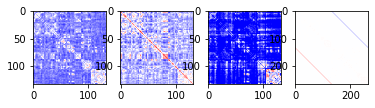

6
0.775269634469089
gie= -0.564283167997331
gee= 0.5881050239507253
gii= 0.5667985362311854
gei= 0.5680494942849218
simFC min: -0.007934900148632188


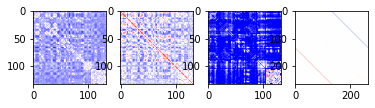

7
0.7586506792608786
gie= -0.5642252343183196
gee= 0.5884781582827534
gii= 0.5665664311478246
gei= 0.5681172500875006
simFC min: -0.007413098069090987


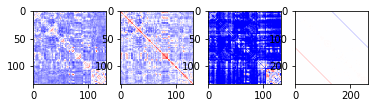

8
0.7738218775267487
gie= -0.5641500422460787
gee= 0.5879559197752406
gii= 0.5666267534226291
gei= 0.5678950497622459
simFC min: -0.00631401848977075


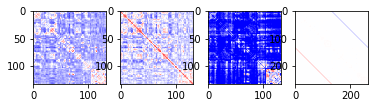

9
0.7186504687687514
gie= -0.5644764537068383
gee= 0.5884971244050635
gii= 0.5670415216909184
gei= 0.56824902486858
simFC min: -0.008239157197084155


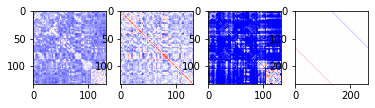

10
0.669200981536087
gie= -0.5666269977776806
gee= 0.5899313551629728
gii= 0.5689705150847137
gei= 0.570110393325392
simFC min: -0.0043368069773212364


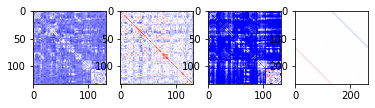

11
0.7494709327843395
gie= -0.5640366271941006
gee= 0.5879873579037076
gii= 0.5665632170138165
gei= 0.5678176430238325
simFC min: -0.00598938139508827


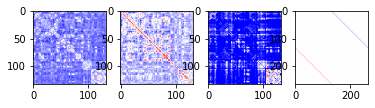

12
0.7125273497012831
gie= -0.5667601179919167
gee= 0.5901600867393453
gii= 0.5695650241489589
gei= 0.5703736995181566
simFC min: -0.007316651690386797


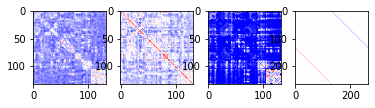

13
0.7766627640330623
gie= -0.5638716747484299
gee= 0.58760735529394
gii= 0.5662906994744464
gei= 0.5676236103809384
simFC min: -0.0067021911029943445


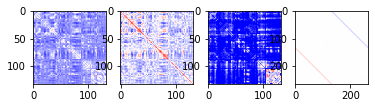

14
0.7235839455576089
gie= -0.5627421347926808
gee= 0.5868827123861058
gii= 0.5649494153015994
gei= 0.5665855518729154
simFC min: -0.006018795745048914


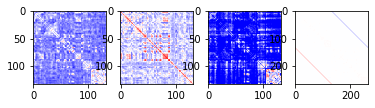

15
0.7629983319110007
gie= -0.562439909767576
gee= 0.5860708077483932
gii= 0.5650417699399232
gei= 0.5661460645879087
simFC min: -0.0080841207768152


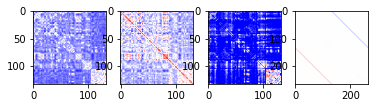

16
0.6669799191653469
gie= -0.5647257611584269
gee= 0.5880114725854596
gii= 0.5666995661516633
gei= 0.5682391131199204
simFC min: -0.00351248247676813


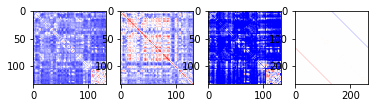

17
0.7809927219381629
gie= -0.5603390082212313
gee= 0.5849840430461077
gii= 0.5622892577618418
gei= 0.5643465855092532
simFC min: -0.006879273783236486


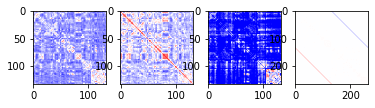

18
0.7560376066824102
gie= -0.5628314225088431
gee= 0.5868371972761993
gii= 0.565091961390305
gei= 0.5666028179828619
simFC min: -0.005917534372352295


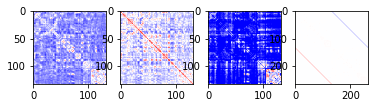

19
0.742816975124106
gie= -0.5632841543444117
gee= 0.5875368640444965
gii= 0.5651468143484394
gei= 0.5671329698030043
simFC min: -0.006457327263277876


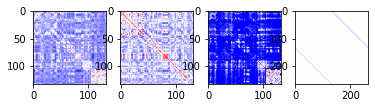

20
0.7864366484532845
gie= -0.5614893300475476
gee= 0.5867719172275986
gii= 0.5631561409989836
gei= 0.5657063154649259
simFC min: -0.008108650247593205


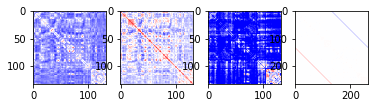

21
22
0.7384386079905203
gie= -0.5652159734705572
gee= 0.5893096151075725
gii= 0.5676249168665903
gei= 0.5690766795714571
simFC min: -0.008584006003599777


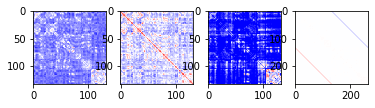

23
0.732897338452109
gie= -0.5667254986257213
gee= 0.5901862982859385
gii= 0.5693821556622256
gei= 0.5703761712326593
simFC min: -0.007037533612541974


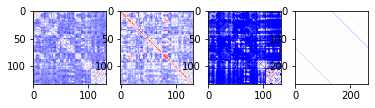

24
0.7401266413223936
gie= -0.5636230960252406
gee= 0.5875952278453346
gii= 0.5659005376906104
gei= 0.567428794033114
simFC min: -0.005233007000909307


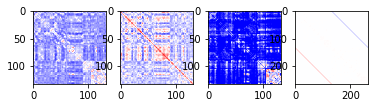

25
0.770887217334822
gie= -0.5566880781132743
gee= 0.58186106783872
gii= 0.5584002427587692
gei= 0.5608817523300195
simFC min: -0.008488152588160202


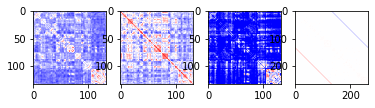

26
27
0.7638756429375376
gie= -0.561138009852868
gee= 0.5849676623931828
gii= 0.5634175480347554
gei= 0.5648934176123197
simFC min: -0.006103619998344102


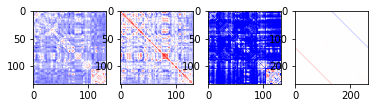

28
0.7177159552708132
gie= -0.5610762523580305
gee= 0.5848079245570061
gii= 0.5634211370415672
gei= 0.564710133648936
simFC min: -0.00589114376451837


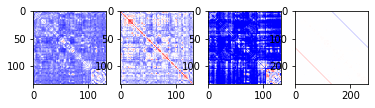

29
0.7636732497183917
gie= -0.560827098555847
gee= 0.5849695353665302
gii= 0.5628715753393503
gei= 0.5646643574482237
simFC min: -0.005754341652343568


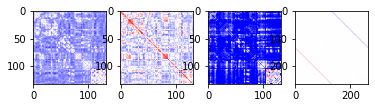

30
0.7673369767760156
gie= -0.5604534176662677
gee= 0.5849746417220952
gii= 0.5623935607589783
gei= 0.5644398210679845
simFC min: -0.0057189872429523544


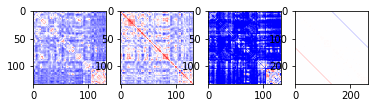

31
0.6785260415509339
gie= -0.5656591086733023
gee= 0.5894528258720263
gii= 0.5681487068590662
gei= 0.5693352006667147
simFC min: -0.005696334181394434


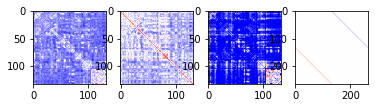

32
0.781189075259141
gie= -0.5634130652178093
gee= 0.5873514533493616
gii= 0.5657452534344112
gei= 0.5672051886245592
simFC min: -0.007471109038295896


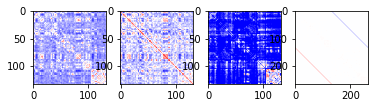

33
0.699126645456042
gie= -0.5665473020927727
gee= 0.5901186233877684
gii= 0.5690458990574007
gei= 0.5702249202618314
simFC min: -0.004659770793261792


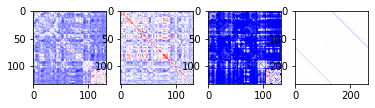

34
0.7716108014400858
gie= -0.5603286470891132
gee= 0.5841812166845727
gii= 0.5621428579938228
gei= 0.5640542254103007
simFC min: -0.005142916230223995


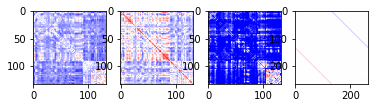

35
0.7018604467896717
gie= -0.5689367980680268
gee= 0.5922064783286719
gii= 0.5714585942077878
gei= 0.5725156664499789
simFC min: -0.004893363124102366


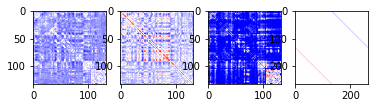

36
0.6857487092746766
gie= -0.5669960578950858
gee= 0.5901372709807962
gii= 0.5695569602809385
gei= 0.570525359172124
simFC min: -0.005278323303085878


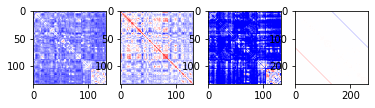

37
0.7996866411295497
gie= -0.5586686778024311
gee= 0.5831336525206338
gii= 0.5607484952451945
gei= 0.5626855519803011
simFC min: -0.007714623376363429


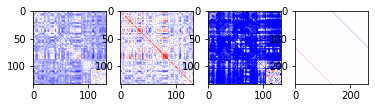

38
0.7292796937992404
gie= -0.5638443352386477
gee= 0.5878156031942158
gii= 0.5661122607256664
gei= 0.5676331701105997
simFC min: -0.0075922302771401886


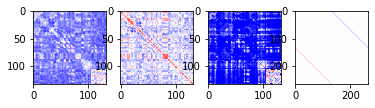

39
40
41
0.7205151747222319
gie= -0.5666305422307589
gee= 0.5903291335433196
gii= 0.5693946691899121
gei= 0.5703476943646604
simFC min: -0.007306684787394721


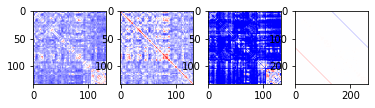

42
0.7527143460679727
gie= -0.5634374843413987
gee= 0.5871721359471135
gii= 0.5659777235276788
gei= 0.5671659633506978
simFC min: -0.007649476613806076


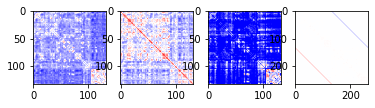

43
44
0.7042152935979289
gie= -0.5628898413658103
gee= 0.5868405379691729
gii= 0.5651027591075393
gei= 0.5666433346291847
simFC min: -0.006944327175028277


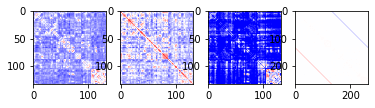

45
0.7329929153448117
gie= -0.5579856672099606
gee= 0.5824257751305324
gii= 0.5598648931120984
gei= 0.5618886256836997
simFC min: -0.004488442629653074


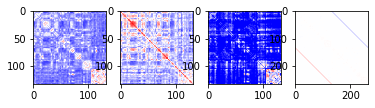

46
0.8160625052270911
gie= -0.5619087413054881
gee= 0.5855771828174887
gii= 0.5635439601301518
gei= 0.5656602486211988
simFC min: -0.005946454138960019


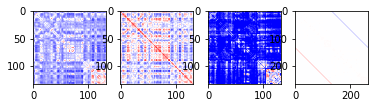

47
0.6483892397441753
gie= -0.5642485676940778
gee= 0.5874256980846418
gii= 0.5667276783401779
gei= 0.567767990726117
simFC min: -0.003865059964478632


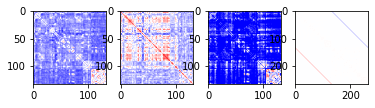

48
0.7071536340564044
gie= -0.5641015922755672
gee= 0.5877800585295353
gii= 0.5664783065000101
gei= 0.5677496463544158
simFC min: -0.00600377338132162


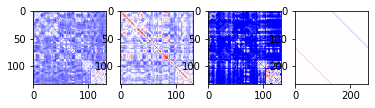

49
0.6816969137115386
gie= -0.5711873193953299
gee= 0.5944120919312073
gii= 0.5739680223008731
gei= 0.574758378165032
simFC min: -0.008210067941488024


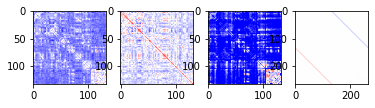

In [10]:
num_roi = 132
gee_placibo = []
for i in range(0, 50):#len(subs)):

    
    print(i)
    file_name = base_dir + 'Harvard-AAL-Segmen_Subject'+ '{0:03}'.format(i+1) +'_Condition001.mat'
    if os.path.isfile(file_name):
        test=scipy.io.loadmat(file_name)
        ts = np.ones((num_roi, 300))
        for i in range(num_roi):
            if test['conditionweights'][0,0][:300].mean() > 0:
                ts[i] = test['data'][0, i+3][300:, 0]
            else:
                ts[i] = test['data'][0, i+3][:300, 0]
        gee = 0.5
        gii = 0.5
        gie = 0.5
        gei = 0.5
        
        
        fc_emp = np.corrcoef(ts)
          
            
        #ts = np.loadtxt(ts_file)
        sc_a = np.zeros((num_roi*2, num_roi*2))
        fc_a = np.zeros((num_roi*2, num_roi*2))
        sc_a[:num_roi,:num_roi] = sc +0.01*fc_emp
        sc_a[num_roi:,num_roi:] = gii*np.eye(num_roi)#
        sc_a[:num_roi,num_roi:] = -0.3*np.eye(num_roi)
        sc_a[num_roi:,:num_roi] = 0.2*np.eye(num_roi)
        sc_a = sc_a/np.linalg.norm(sc_a)
        

        
        
        
        fc_a[:num_roi,:num_roi] = fc_emp
        fc_a[num_roi:,num_roi:] = .8*fc_emp #np.ones(num_roi)#
        fc_a[:num_roi,num_roi:] = 0.2*np.ones(num_roi)#0.2*fc_emp#
        fc_a[num_roi:,:num_roi] = 0.2*np.ones(num_roi)#0.2*fc_emp#
        std = 1.0e-3
        num_converge= 50
        
        model = LinearFit(sc_a, fc_a)
        model.ldm_2nd_model_fitting(std, num_converge)
        sc_fitted = model.eSC
        fc_sim = model.simFC

        fig, ax = plt.subplots(1,4)
        ax[0].imshow(fc_sim[:num_roi,:num_roi]- np.diag(np.diag(fc_sim[:num_roi,:num_roi])), cmap='bwr')
        
        ax[1].imshow(fc_emp, cmap='bwr')
        ax[2].imshow(sc, cmap='bwr')
        ax[3].imshow(sc_fitted- np.diag(np.diag(sc_fitted)), cmap='bwr')

        print(np.corrcoef(fc_emp[np.tril_indices(num_roi,-1)], fc_sim[:num_roi,:num_roi][np.tril_indices(num_roi,-1)])[0,1])
        print('gie=', np.array([sc_fitted[i,num_roi+i] for i in range(num_roi)]).mean())
        print('gee=', np.array([sc_fitted[i,i] for i in range(num_roi)]).mean())
        #sc_fitted[np.abs(sc_fitted) < 0.5*np.abs(sc_fitted).mean()] = 0
        gee_placibo.append(sc_fitted.ravel())
        #gee_placibo.append(np.concatenate([np.diag(sc_fitted[:num_roi,num_roi:2*num_roi]), np.diag(sc_fitted[num_roi:2*num_roi,:num_roi])]))
        print('gii=', np.array([sc_fitted[num_roi+i,num_roi+i] for i in range(num_roi)]).mean())
        print('gei=', np.array([sc_fitted[num_roi+i,i] for i in range(num_roi)]).mean())
        print('simFC min:', fc_sim.min())
        plt.show()

In [11]:
data_fitting = np.concatenate([np.array(gee_lsd), np.array(gee_placibo)], axis=0)

In [ ]:
data_fitting_file = base_dir + 'fittingresults_2p_lin_LSD.txt'
np.savetxt(data_fitting_file, data_fitting)
